In [1]:
import earthpy.plot as ep
import matplotlib.pyplot as plt
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image
from matplotlib.colors import ListedColormap #configuração de cores

In [2]:
from glob import glob
import numpy as np
from scipy.io import loadmat
import rasterio as rio

# filesPath = 'images/lagoa_freitas/2015/lagoa_freitas_v1_B[1-6].TIF'
filesPath = 'images/lagoa_freitas/2015/lagoa_freitas_v2_B[1-6].TIF'


recreio_bands = glob(filesPath)
recreio_bands.sort()

l_recreio = []
for i in recreio_bands:
    with rio.open(i, 'r',) as f:
        l_recreio.append(f.read(1))

arr_st = rio.open('images/bangalore_data/l5_Bangalore2011_raw.tif', 'r', driver='GTiff').read(6)
arr_re = np.stack(l_recreio)

y_data = rio.open('images/bangalore_data/l5_Bangalore2011_builtup.tif') # loadmat('images/sundarbans_data/Sundarbands_gt.mat')['gt']

print(arr_re.shape)
print(arr_st.shape)
print(y_data.shape)

(6, 360, 500)
(2054, 2044)
(2054, 2044)


In [62]:
from glob import glob
import numpy as np
from scipy.io import loadmat
import rasterio as rio

filesPath = 'images/lagoa_freitas/2015/lagoa_freitas_v2_B[1-6].TIF'
#filesPath = 'images/lagoa_freitas/2015/lagoa_freitas_v2_B[2,3,4].TIF'
#filesPath = 'images/lagoa_freitas/2015/lagoa_freitas_v2_B[3,4,5].TIF'
#filesPath = 'images/lagoa_freitas/2015/lagoa_freitas_v2_B[2,5,6].TIF'
#filesPath = 'images/lagoa_freitas/2015/lagoa_freitas_v2_B[1,3,4].TIF'

S_sentinel_bands = glob('images/sundarbans_data/*B0[1-6]?*.tiff')
#S_sentinel_bands = glob('images/sundarbans_data/*B0[2,3,4]?*.tiff')
#S_sentinel_bands = glob('images/sundarbans_data/*B0[3,4,5]?*.tiff')
#S_sentinel_bands = glob('images/sundarbans_data/*B0[2,5,6]?*.tiff')
#S_sentinel_bands = glob('images/sundarbans_data/*B0[1,3,4]?*.tiff')
S_sentinel_bands.sort()

recreio_bands = glob(filesPath)
recreio_bands.sort()

l = []
for i in S_sentinel_bands:
    with rio.open(i, 'r') as f:
        l.append(f.read(1))

l_recreio = []
for i in recreio_bands:
    with rio.open(i, 'r') as f:
        l_recreio.append(f.read(1))

arr_st = np.stack(l)
arr_re = np.stack(l_recreio)

y_data = loadmat('images/sundarbans_data/Sundarbands_gt.mat')['gt']

print(arr_re.shape)

(6, 200, 150)


In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# normalize data
x = np.moveaxis(arr_st, 0, -1)
# X_data = x.reshape(-1, 7)
X_data = x.reshape(-1, 6) # 6 bandas
#X_data = x.reshape(-1, 3) # 3 bandas
scaler = StandardScaler().fit(X_data)
X_scaled = scaler.transform(X_data)

# normalize
r = np.moveaxis(arr_re, 0, -1)
# R_data = r.reshape(-1, 7)
R_data = r.reshape(-1, 6) # 6 bandas
#R_data = r.reshape(-1, 3) # 3 bandas
r_scaler = StandardScaler().fit(R_data)
R_scaled = r_scaler.transform(R_data)

# split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_data.ravel(),test_size=0.30, stratify = y_data.ravel())

print(f"X_train Shape: {X_train.shape}\nX_test Shape: {X_test.shape}\ny_train Shape: {y_train.shape}\ny_test Shape:{y_test.shape}")

print(f"R_scaled shape: {R_scaled.shape}")

X_train Shape: (199004, 6)
X_test Shape: (85288, 6)
y_train Shape: (199004,)
y_test Shape:(85288,)
R_scaled shape: (30000, 6)


In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# K-NNC
knn = KNeighborsClassifier(n_neighbors=6) # N classes de classificação
knn.fit(X_train, y_train)

#Predict the label of test data
knn_pred = knn.predict(X_test)


print(f"Accuracy: {accuracy_score(y_test, knn_pred)*100}")
print(classification_report(y_test, knn_pred))

Accuracy: 96.28787168183098
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     16222
           1       0.99      1.00      0.99     23570
           2       1.00      1.00      1.00      6095
           3       0.96      0.97      0.97     16790
           4       0.97      0.95      0.96     13545
           5       0.93      0.88      0.91      9066

    accuracy                           0.96     85288
   macro avg       0.96      0.96      0.96     85288
weighted avg       0.96      0.96      0.96     85288



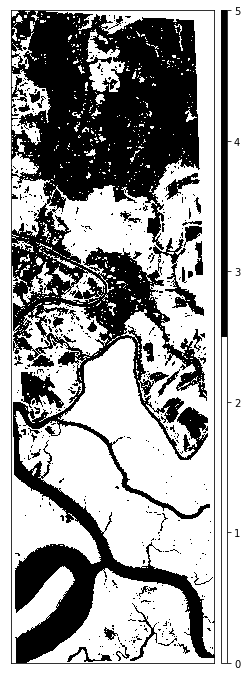

<AxesSubplot:>

In [7]:
# ep.plot_bands(knn.predict(X_scaled).reshape((954, 298)), cmap=ListedColormap(['darkgreen', 'green', 'black','#CA6F1E', 'navy', 'forestgreen']))
#ep.plot_bands(knn.predict(X_scaled).reshape((954, 298)), cmap=ListedColormap(['white', 'black', 'red', 'green', 'yellow', 'navy']))
# ep.plot_bands(knn.predict(X_scaled).reshape((954, 298)), cmap=ListedColormap(['black', 'forestgreen', 'navy']))
# ep.plot_bands(knn.predict(X_scaled).reshape((954, 298)), cmap=ListedColormap(['white', 'black', 'red', 'green']))
#ep.plot_bands(knn.predict(X_scaled).reshape((954, 298)), cmap=ListedColormap(['white', 'black', 'red', 'green', 'yellow']))
ep.plot_bands(knn.predict(X_scaled).reshape((954, 298)), cmap=ListedColormap(['white', 'black']))
# ep.plot_bands(knn.predict(X_scaled).reshape((954, 298)), cmap=ListedColormap(['white', 'black', 'red']))

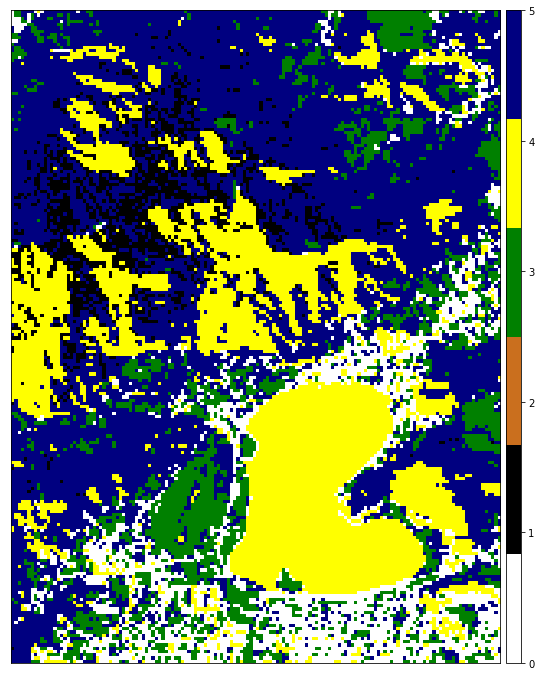

<AxesSubplot:>

In [71]:
# (200, 500) recreio size
# (360, 500) lagoa size
# (200, 150) - lagoa v2
# ep.plot_bands(knn.predict(R_scaled).reshape((200, 150)), cmap=ListedColormap(['darkgreen', 'green', 'black','#CA6F1E', 'navy', 'forestgreen']))
# 3 clases
#ep.plot_bands(knn.predict(R_scaled).reshape((200, 150)), cmap=ListedColormap(['white','black', '#CA6F1E']))
# 4 classes
#ep.plot_bands(knn.predict(R_scaled).reshape((200, 150)), cmap=ListedColormap(['white','black', '#CA6F1E', 'green']))
# 5 classes
#ep.plot_bands(knn.predict(R_scaled).reshape((200, 150)), cmap=ListedColormap(['white','black', '#CA6F1E', 'green', 'yellow']))
# 6 classes
ep.plot_bands(knn.predict(R_scaled).reshape((200, 150)), cmap=ListedColormap(['white','black', '#CA6F1E', 'green', 'yellow','navy']))
# 2 classes
#ep.plot_bands(knn.predict(R_scaled).reshape((200, 150)), cmap=ListedColormap(['white', 'black']))